         deneyim          maas
count  14.000000     14.000000
mean    6.257143   8778.571429
std     4.970175   5733.495185
min     0.100000   2250.000000
25%     2.250000   4125.000000
50%     5.500000   7750.000000
75%     9.500000  12000.000000
max    15.000000  20000.000000
score:  0.9664883279328408
[1754.18605486]
[[1113.87995072]]
Elde edilen regresyon modeli: Maas=[1754.18605486]+[1113.87995072]Deneyim


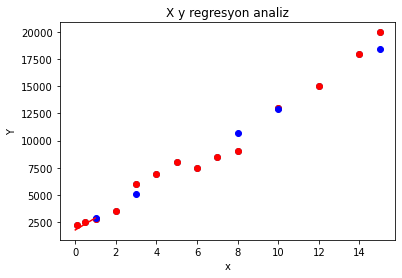

C:\Users\dogukan.ozgen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Verilmesi gereken maas:  [[16234.62541418]]


C:\Users\dogukan.ozgen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Verilmesi gereken maas:  [[7323.58580844]]


C:\Users\dogukan.ozgen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = pd.read_csv('dataset/dataset.csv')

#print(data)
#result = data.columns
#print(result)

deneyim = data['deneyim'].values.reshape(-1,1)
maas = data["maas"].values.reshape(-1,1)

print(data.describe())


#algorithm

import sklearn.linear_model as lm

reg = lm.LinearRegression()

#data split
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(deneyim,maas, test_size=1/3,random_state=0)

reg.fit(x_train,y_train)

#prediction

y_pred = reg.predict(x_test)

#print(x_test,y_pred)

#score

import sklearn.metrics as mt

score = mt.r2_score(y_test,y_pred)

print('score: ' , score)


print(reg.intercept_)
print(reg.coef_)

print("Elde edilen regresyon modeli: Maas={}+{}Deneyim".format(reg.intercept_,reg.coef_[0]))



random_x = np.array([0, 0.5, 0.99])
plt.scatter(deneyim, maas)
plt.plot(random_x,
         reg.intercept_[0] +
         reg.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('X y regresyon analiz')


#graph

plt.scatter(deneyim,maas,color = 'r')
plt.scatter(x_test,y_pred,color = 'b')
plt.show()


def maasTahmin(deneyim):
    return reg.predict(deneyim)
    

while True:
    
    deneyim_giris = input('Deneyim Girin: ')
    maasTahmini = maasTahmin([[deneyim_giris]])

    print('Verilmesi gereken maas: ',maasTahmini)


